In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets.base import Bunch


import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES

%matplotlib inline

In [10]:
# load patient data
import pickle
from sklearn.datasets.base import Bunch

folder_path = '../../../data/lungcancer/Transformation_survival_stage_cls/'

d = pickle.load(open(folder_path + 'patient_data_unwanted.pkl', 'rb'))

patient_data =  Bunch(data=d['data'], target=d['target'], target_name=d['target_names'], target_real=d['target_real'], class_names=d['class_names'])

data_p = patient_data.data
target_p = patient_data.target
target_real_p = patient_data.target_real
target_names_p = patient_data.target_name
class_names_p = patient_data.class_names
display(data_p.shape, target_p.shape, target_real_p.shape, target_names_p.shape, data_p[0:5], target_p[0:5], target_real_p[0:5], target_names_p[0:5], class_names_p)

(939, 22)

(939,)

(939,)

(939,)

array([[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]])

array([1, 1, 0, 1, 0])

array([ 4,  2, 12,  0, 15])

array(['Short survival(stage III or IV and survival_months <12)',
       'Short survival(stage III or IV and survival_months <12)',
       'Long survival(stage III or IV and survival_months >=12)',
       'Short survival(stage III or IV and survival_months <12)',
       'Long survival(stage III or IV and survival_months >=12)'],
      dtype=object)

['Long survival(stage III or IV and survival_months >=12)',
 'Short survival(stage III or IV and survival_months <12)',
 'Long survival(stage I or II and survival_months >=24)',
 'Short survival(stage I or II and survival_months <24)']

(939, 22)
['Long survival(stage III or IV and survival_months >=12)', 'Short survival(stage III or IV and survival_months <12)', 'Long survival(stage I or II and survival_months >=24)', 'Short survival(stage I or II and survival_months <24)']
{0, 1, 2, 3}
218


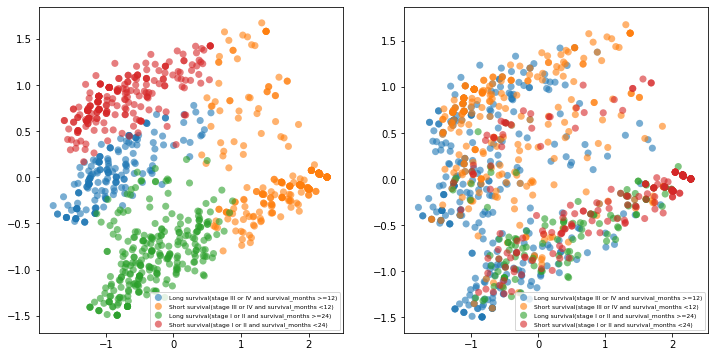

In [110]:
# KMeans algorithm
%matplotlib inline
sklearn_pca = PCA(n_components = 22)
Y_sklearn = sklearn_pca.fit_transform(data_p)
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
print (Y_sklearn.shape)

plt.figure(figsize=(12,6))
a = plt.subplot(121)
b = plt.subplot(122)
# plotting graph

'''groups = [str(x) for x in target_names_p.categories]
labels = set(target_p)
print (groups)
print (labels)'''

groups = class_names_p
labels = set(target_p)
print (groups)
print (labels)


for label, group in zip(labels, groups):
    c = prediction == label
    a.scatter(Y_sklearn[c][:,0], Y_sklearn[c][:,1], s=50, edgecolors='none', alpha=0.6, label=group)
a.legend(loc=4, fontsize=6)

for label, group in zip(labels, groups):
    c = target_p == label
    b.scatter(Y_sklearn[c][:,0], Y_sklearn[c][:,1], edgecolors='none', s=50, alpha=0.6, label=group)
b.legend(loc=4, fontsize=6)

df = pd.DataFrame(data={'Actual':target_p, 'Prediction':prediction })
print (len(df[df['Actual'] == df['Prediction']]))
plt.savefig(folder_path + 'kmeans',dpi=120)

(939, 22) (939,)
(657, 22) (282, 22) (657,) (282,)
['Long survival(stage III or IV and survival_months >=12)', 'Short survival(stage III or IV and survival_months <12)', 'Long survival(stage I or II and survival_months >=24)', 'Short survival(stage I or II and survival_months <24)']
{0, 1, 2, 3}


/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(22, 4 - 1) = 3 components.
  ChangedBehaviorWarning)
/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


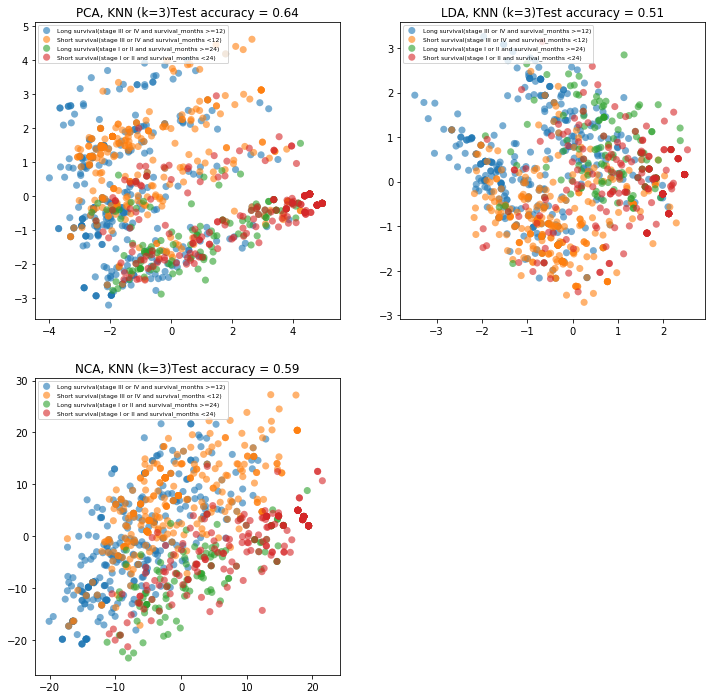

In [122]:
#LDA and NCA is working best for whole data but enable to find variance for unseen data

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


n_neighbors = 3


X, y = data_p, target_p

#X_train, y_train  =  data_p, target_p
X#_test, y_test =  data_p, target_p

# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, stratify=y,
                     random_state=None)

print (X.shape, y.shape)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=10, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=10))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=10,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]


'''groups = [str(x) for x in target_names_p.categories]
labels = set(target_p)
print (groups)
print (labels)'''

groups = class_names_p
labels = set(target_p)
print (groups)
print (labels)

plt.figure(figsize=(12,12))

for i, (name, model) in enumerate(dim_reduction_methods):
    
    x = plt.subplot(2,2,i+1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    for label, group in zip(labels, groups):
        c =  (y==label)
        x.scatter(X_embedded[c][:,0], X_embedded[c][:,1], s=50, edgecolors='none', alpha=0.6, label=group)
    x.legend(loc=2, fontsize=6)

    x.set_title("{}, KNN (k={})Test accuracy = {:.2f}".format(name, n_neighbors, acc_knn))
    
plt.savefig(folder_path + 'knn_lda_pca', dpi=120)
plt.show()

['Long survival(stage III or IV and survival_months >=12)', 'Short survival(stage III or IV and survival_months <12)', 'Long survival(stage I or II and survival_months >=24)', 'Short survival(stage I or II and survival_months <24)']
{0, 1, 2, 3}
0.34930777422790205


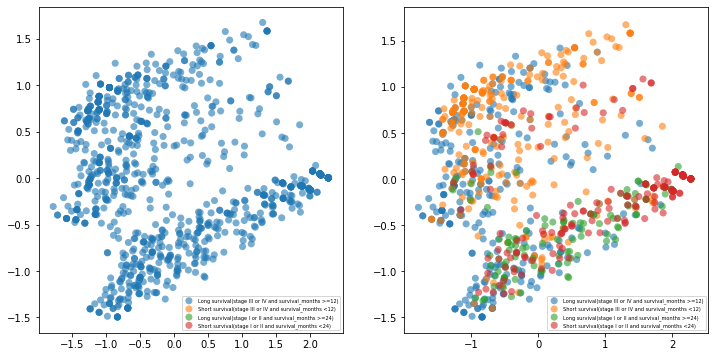

In [108]:
# DBSCAN algorithm

sklearn_pca = PCA(n_components = 22)
Y_sklearn = sklearn_pca.fit_transform(data_p)
# Y_sklearn = data
dbscan = DBSCAN(eps=5.0, min_samples=5)
# fitted = dbscan.fit(Y_sklearn)
prediction = dbscan.fit_predict(Y_sklearn)


plt.figure(figsize=(12,6))
a = plt.subplot(121)
b = plt.subplot(122)
# plotting graph

'''groups = [str(x) for x in target_names_p.categories]
labels = set(target_p)
print (groups)
print (labels)'''

groups = class_names_p
labels = set(target_p)
print (groups)
print (labels)
for label, group in zip(labels, groups):
    c =  (prediction==label)
    a.scatter(Y_sklearn[c][:,0], Y_sklearn[c][:,1], s=50, edgecolors='none', alpha=0.6, label=group)
a.legend(loc=4, fontsize=5)

for label, group in zip(labels, groups):
    c =  target_p==label
    b.scatter(Y_sklearn[c][:,0], Y_sklearn[c][:,1], edgecolors='none', s=50, alpha=0.6, label=group)
b.legend(loc=4, fontsize=5)

df = pd.DataFrame(data={'Actual':target_p, 'Prediction':prediction })
print (len(df[df['Actual'] == df['Prediction']])/df.shape[0])
plt.savefig(folder_path + 'dbscan',dpi=120)